In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df_ii = pd.read_csv('../../../outputs/tables/eval.csv')
df_c = pd.read_csv('../../../outputs/tables/evalclassification.csv')
df_c.drop(['level_0'], axis = 1, inplace = True) 

In [5]:
df_c 

,model,Cell contour,Cell cycle phase (bf),Cell cycle phase (df),Cell cycle phase (ef),Cell eccentricity,Cell texture,Colocalization patterns,Pollen,Pre-cancerous and cervical cancer lesions,Synhtetic White blood cell,White blood cell,amyloid beta morphology patterns (a),amyloid beta morphology patterns (b),clinical chronic heart failure,colorectal cancer texture
0,ALIGN,0.32 (0.036666666666666625),0.23 (0.03230148048452222),0.24 (0.032345013477088985),0.19 (0.029609690444145353),0.47 (0.040000000000000036),0.34 (0.03833333333333333),0.36 (0.09473684210526317),0.18 (0.03),0.17 (0.12500000000000003),0.21 (0.026000000000000023),0.22 (0.02124999999999999),0.23 (0.038696537678207715),0.26 (0.03125),0.51 (0.05102040816326525),0.21 (0.026000000000000023)
1,BLIP,0.31 (0.03833333333333333),0.22 (0.02960969044414538),0.2 (0.029649595687331526),0.21 (0.029609690444145353),0.33 (0.03999999999999998),0.32 (0.03833333333333333),0.22 (0.09473684210526315),0.24 (0.03428571428571425),0.33 (0.14583333333333337),0.2 (0.027000000000000024),0.21 (0.020186518487138316),0.27 (0.04276985743380857),0.25 (0.03),0.49 (0.04846938775510201),0.2 (0.024999999999999994)
2,BioMedCLIP,0.35 (0.03833333333333333),0.27 (0.03230148048452225),0.2 (0.029649595687331526),0.33 (0.03499327052489909),0.38 (0.03999999999999998),0.36 (0.040000000000000036),0.51 (0.10526315789473684),0.18 (0.03),0.02 (0.10416666666666667),0.21 (0.025999999999999995),0.21 (0.01999999999999999),0.16 (0.03258655804480651),0.38 (0.034261810011073535),0.55 (0.05102040816326536),0.4 (0.030999999999999972)
3,ConchCLIP,NaN,NaN,0.12 (0.024258760107816718),0.04 (0.014804845222072677),NaN,NaN,0.0 (nan),0.22 (0.032857142857142835),0.29 (0.14583333333333331),0.17 (0.025000000000000022),0.18 (0.019375000000000003),NaN,0.33 (0.03249999999999997),0.59 (0.04846938775510201),0.39 (0.030999999999999972)
4,OpenCLIP,0.33 (0.03833333333333333),0.27 (0.032301480484522194),0.27 (0.03369272237196769),0.32 (0.03364737550471064),0.39 (0.040000000000000036),0.33 (0.03833333333333333),0.12 (0.08421052631578949),0.23 (0.032857142857142835),0.54 (0.14583333333333337),0.24 (0.027000000000000024),0.28 (0.021875000000000033),0.02 (0.016293279022403257),0.2 (0.028749999999999998),0.55 (0.04846938775510201),0.31 (0.029000000000000026)
5,PLIP,0.35 (0.03833333333333333),0.09 (0.02288021534320324),0.16 (0.028301886792452824),0.14 (0.02618869668682386),0.35 (0.03833333333333333),0.33 (0.03833333333333333),0.16 (0.08421052631578949),0.19 (0.03),0.08 (0.10416666666666667),0.24 (0.027000000000000024),0.2 (0.020624999999999977),0.04 (0.020366598778004077),0.25 (0.03125),0.47 (0.05102040816326536),0.54 (0.030999999999999917)
6,QuiltCLIP,0.42 (0.040000000000000036),0.0 (nan),0.0 (0.0067385444743935305),0.0 (nan),0.34 (0.040000000000000036),0.39 (0.03999999999999998),0.2 (0.08749539364507652),0.2 (0.031428571428571445),0.4 (0.14583333333333331),0.13 (0.021999999999999992),0.21 (0.020625000000000004),0.25 (0.038696537678207715),0.34 (0.03375),0.51 (0.04846938775510212),0.36 (0.030000000000000027)


In [178]:


df_ii[ df_ii.columns[1:]] =  df_ii[ df_ii.columns[1:]].replace({'\s*\(.+\)': ''}, regex=True).astype(float)
df_ii =  df_ii[['model',"domain","modality","stain","subdomain","submodality"]]
df_ii_transposed =  df_ii.set_index('model').T
df_ii_transposed =  df_ii_transposed.loc[["stain","modality","submodality","subdomain","domain"],:]

In [179]:
df_c[ df_c.columns[1:]] =  df_c[ df_c.columns[1:]].replace({'\s*\(.+\)': ''}, regex=True).astype(float)
df_c =  df_c.set_index('model').T


In [180]:
df_ii_transposed

model,ALIGN,BLIP,OpenCLIP,BioMedCLIP,QuiltCLIP,PLIP,ConchCLIP
stain,0.37,0.20,0.25,0.55,0.43,0.24,0.41
modality,0.76,0.32,0.80,0.79,0.65,0.59,0.06
submodality,0.42,0.20,0.14,0.20,0.36,0.32,0.03
subdomain,0.37,0.21,0.36,0.54,0.46,0.46,0.40
domain,0.35,0.19,0.13,0.43,0.09,0.16,0.21


In [181]:
combined_df = pd.concat([df_ii_transposed, df_c])

In [8]:
model_colors = {
    'ALIGN': 'orange',
    'BLIP': 'forestgreen',
    'OpenCLIP': 'steelblue',
    
    'BioMedCLIP': 'darkblue',
    'QuiltCLIP': 'darkmagenta',
    'PLIP': 'orchid',
    'ConchCLIP': 'lightpink'
}

In [182]:
def save_plot(plt,output_name:str):
    # Save the plot as PDF and PNG with 300 DPI
    pdf_path = f"{output_name}.pdf"
    png_path = f"{output_name}.png"
    plt.savefig(pdf_path, dpi=300)
    plt.savefig(png_path, dpi=300)
    plt.close()

    # Close the plot
     

    print(f"Plot saved as {pdf_path} and {png_path}")

In [183]:
random_performance=0.2
plt.figure(figsize=(12, 15))
df_ii_transposed.plot(kind='barh', ax=plt.gca(), width=0.8,color=[model_colors[model] for model in df_transposed.columns])
plt.axvline(x=random_performance, color='dimgray', linestyle='--', label='Random Performance')
plt.xlabel('Accuracy')
plt.ylabel('Instance Identification')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,1)
plt.tight_layout()
save_plot(plt,output_name="fig2")
plt.show()

Plot saved as fig2.pdf and fig2.png


In [187]:
random_performance=0.2
plt.figure(figsize=(12, 15))
df_c.plot(kind='barh', ax=plt.gca(), width=0.8,color=[model_colors[model] for model in df_transposed.columns])
plt.axvline(x=random_performance, color='dimgray', linestyle='--', label='Random Performance')
plt.xlabel('Accuracy')
plt.ylabel('Classification')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,1)
plt.tight_layout()
save_plot(plt,output_name="fig2c")
plt.show()

Plot saved as fig2c.pdf and fig2c.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



def save_plot(plt, output_name: str):
    pdf_path = f"{output_name}.pdf"
    png_path = f"{output_name}.png"
    plt.savefig(pdf_path, dpi=300)
    plt.savefig(png_path, dpi=300)
    #plt.close()
    print(f"Plot saved as {pdf_path} and {png_path}")
    
def get_values_and_ci(df):
    # Separate values and errors
    for col in df.columns[1:]:
        df[[col + '_value', col + '_error']] = df[col].str.extract(r'([0-9.]+)\s*\((0\.[0-9]+)\)').astype(float)

    # Drop original columns with combined values and errors
    df.drop(columns=[col for col in df.columns if not col.endswith('_value') and not col.endswith('_error') and not col.endswith('model')], inplace=True)

    # Set index to 'model' for easier plotting
    df.set_index('model', inplace=True)

    # Transpose for plotting
    df_values = df[[col for col in df.columns if col.endswith('_value')]].transpose()
    df_errors = df[[col for col in df.columns if col.endswith('_error')]].transpose()
    df_values.index = df_values.index.str.replace('_value', '')
    df_errors.index = df_errors.index.str.replace('_error', '')
    return df_values,df_errors


# Colors for the bars
model_colors = {
    'ALIGN': 'orange',
    'BLIP': 'forestgreen',
    'OpenCLIP': 'steelblue',
    'BioMedCLIP': 'darkblue',
    'QuiltCLIP': 'darkmagenta',
    'PLIP': 'orchid',
    'ConchCLIP': 'lightpink'
}



# Sample data
df = pd.read_csv('../../../outputs/tables/eval.csv')
df_values,df_errors =  get_values_and_ci(df)


Plot saved as instance_identification_accuracy.pdf and instance_identification_accuracy.png


<Figure size 1500x2000 with 0 Axes>

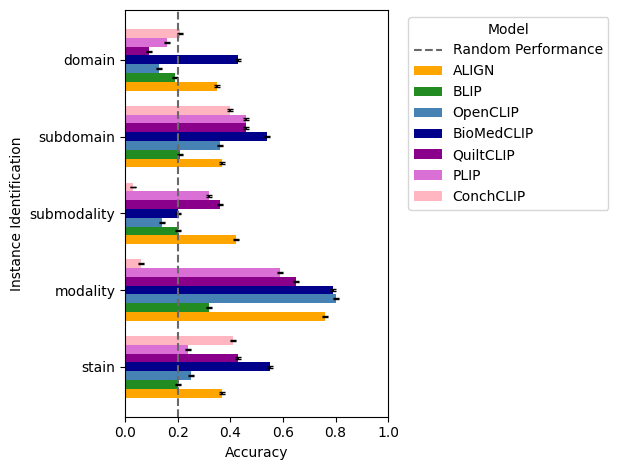

In [16]:



# Plot Instance Identification
plt.figure(figsize=(15, 20))
ax = df_values.loc[['stain', 'modality', 'submodality', 'subdomain', 'domain']].plot(kind='barh', 
                                                                                     yerr=df_errors.loc[['stain', 'modality', 'submodality', 'subdomain', 'domain']],
                                                                                     capsize=2,
                                                                                     width=0.8,
                                                                                     color=[model_colors[model] for model in df_values.columns])
plt.axvline(x=0.2, color='dimgray', linestyle='--', label='Random Performance')
plt.xlabel('Accuracy')
plt.ylabel('Instance Identification')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 1)
plt.tight_layout()
save_plot(plt, output_name="instance_identification_accuracy")
plt.show()



In [10]:
# Sample data
df = pd.read_csv('../../../outputs/tables/evalclassification.csv')
df.drop(['level_0'], axis = 1, inplace = True) 
df_values,df_errors =  get_values_and_ci(df)


Plot saved as close_set_classification_accuracy.pdf and close_set_classification_accuracy.png


<Figure size 3000x4000 with 0 Axes>

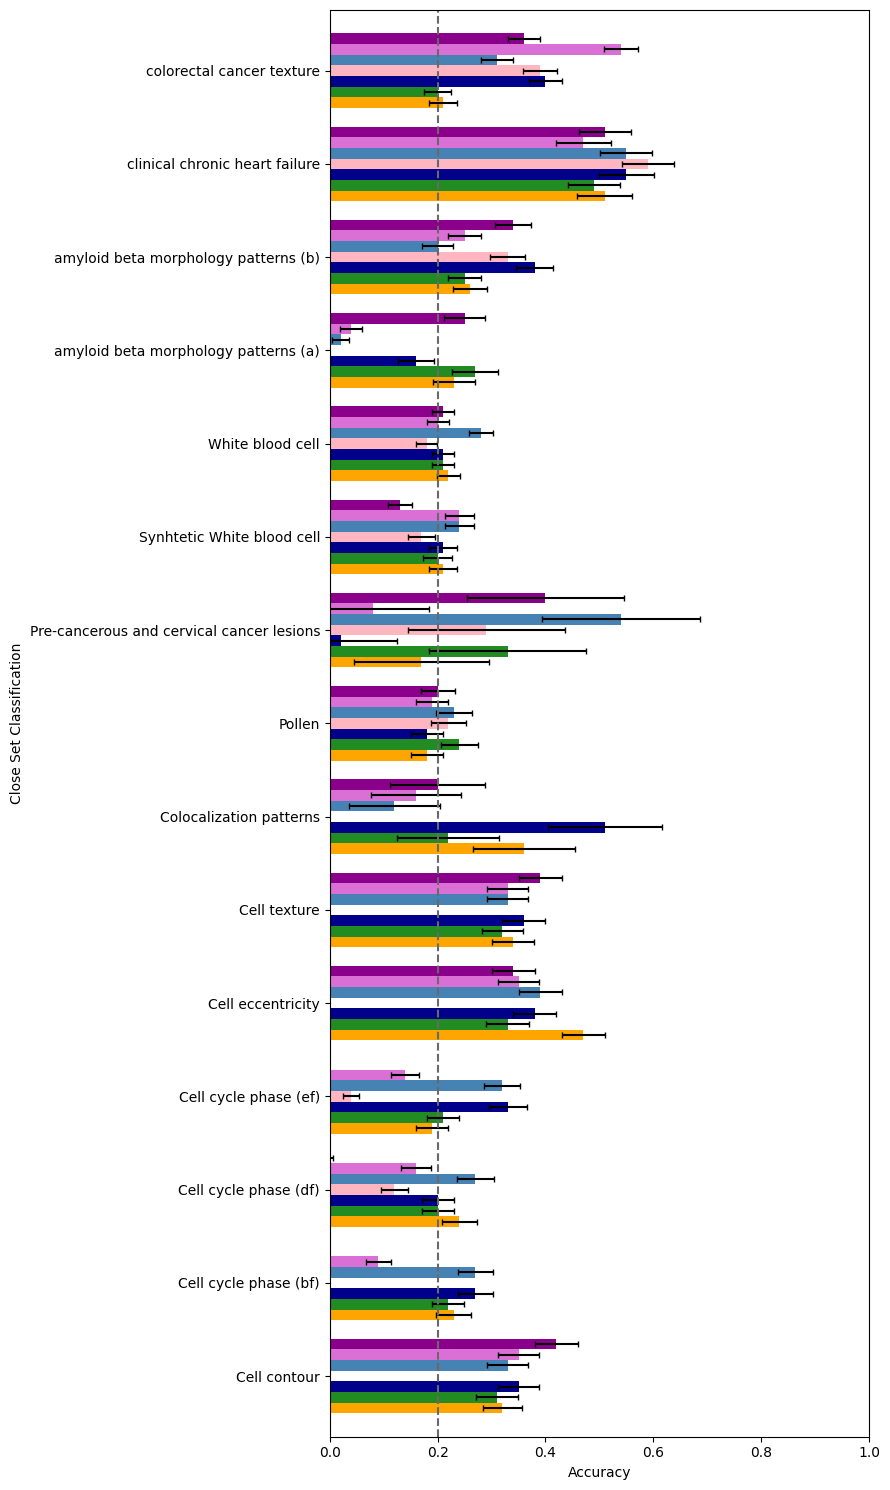

In [52]:

plt.figure(figsize=(30, 40))
ax = df_values.plot(kind='barh', 
                 xerr=df_errors,
                 capsize=2,
                 width=0.8,
                 color=[model_colors[model] for model in df_values.columns],
                 figsize=(9,15))
plt.axvline(x=0.2, color='dimgray', linestyle='--', label='Random Performance')
plt.xlabel('Accuracy')
plt.ylabel('Close Set Classification')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left').remove()
plt.xlim(0, 1)
plt.tight_layout()


save_plot(plt, output_name="close_set_classification_accuracy")
plt.show()

